Question: There are 50 states in USA. based on the features given pls apply Kmeans and HC clustering algorithms to identify the simililar clusters


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

Read data into python

In [2]:
states=pd.read_csv(r"C:\Users\Dell\Downloads\USArrests.csv")

Check the dataset and get basic information

In [3]:
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


There are only numerical variables in the dataset - no categorical variables are there 

Basic statistical summary of the dataset

In [4]:
states.describe().T.style.background_gradient(cmap="Reds")

,count,mean,std,min,25%,50%,75%,max
Murder,50.000000,7.788000,4.355510,0.800000,4.075000,7.250000,11.250000,17.400000
Assault,50.000000,170.760000,83.337661,45.000000,109.000000,159.000000,249.000000,337.000000
UrbanPop,50.000000,65.540000,14.474763,32.000000,54.500000,66.000000,77.750000,91.000000
Rape,50.000000,21.232000,9.366385,7.300000,15.075000,20.100000,26.175000,46.000000


Dimension of the dataset

In [5]:
states.shape

(50, 5)

In [14]:
states.index = states.iloc[:,0]
states.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Index,,,,,
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [15]:
states = states.iloc[:,1:5]
states.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [16]:
states.index.name = "Index"
states.head()

,Murder,Assault,UrbanPop,Rape
Index,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


Checking for the null values

In [17]:
states.isnull().sum().to_frame().style.bar(color="red")

,0
Murder,0
Assault,0
UrbanPop,0
Rape,0


Checking for the skewness

In [18]:
states.skew().sort_values(ascending=False).to_frame().style.bar(color="red")

,0
Rape,0.801200
Murder,0.393956
Assault,0.234410
UrbanPop,-0.226009


Chances of outlier presence in these due to skewness

Data Visualisation

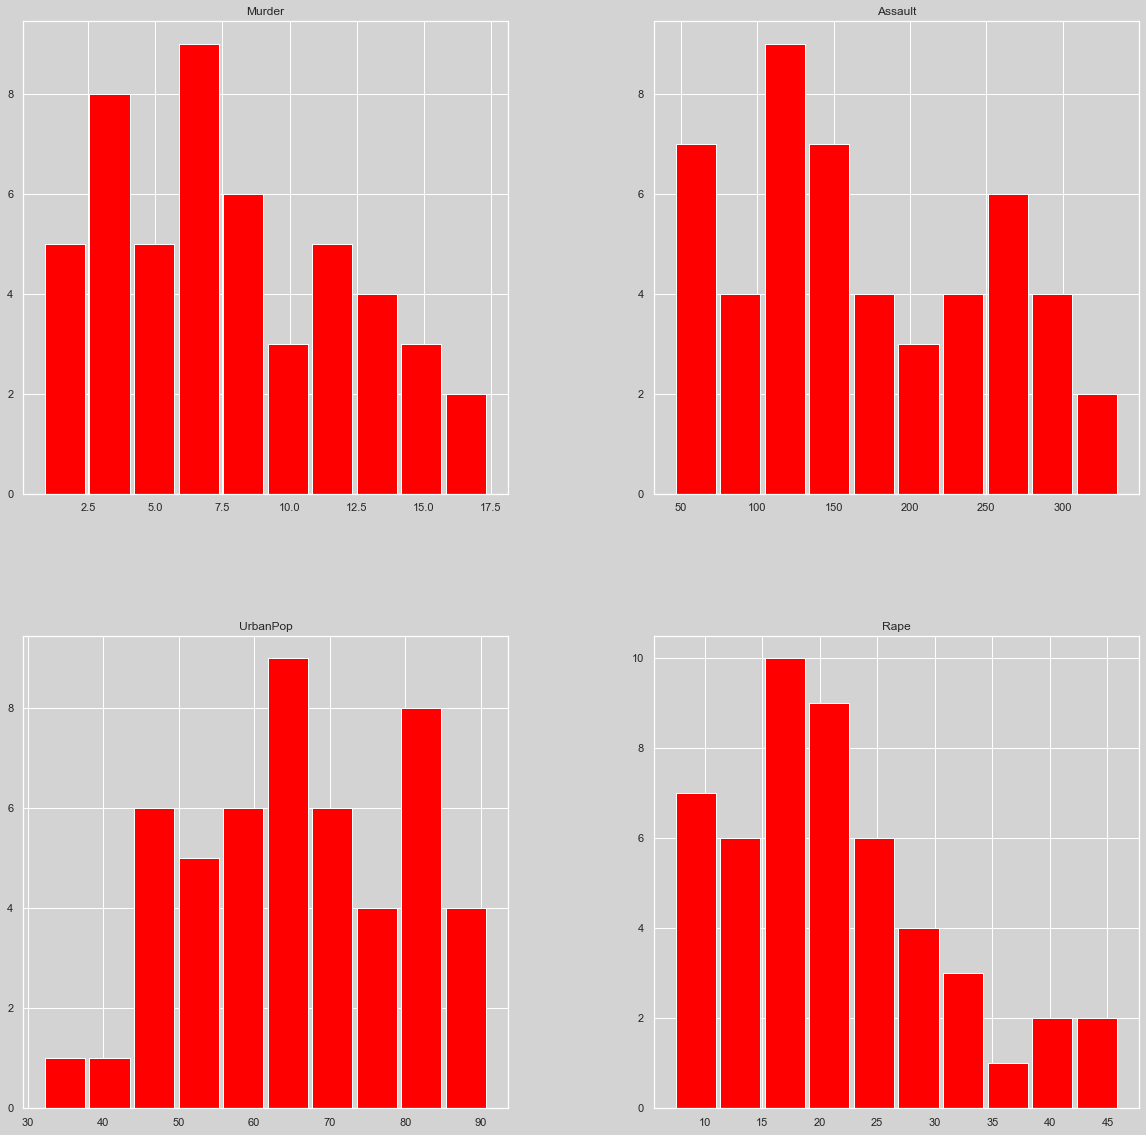

In [19]:
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'})
states.hist(figsize=(20,20),rwidth=0.9,color="red")
plt.show()

Checking for the outliers

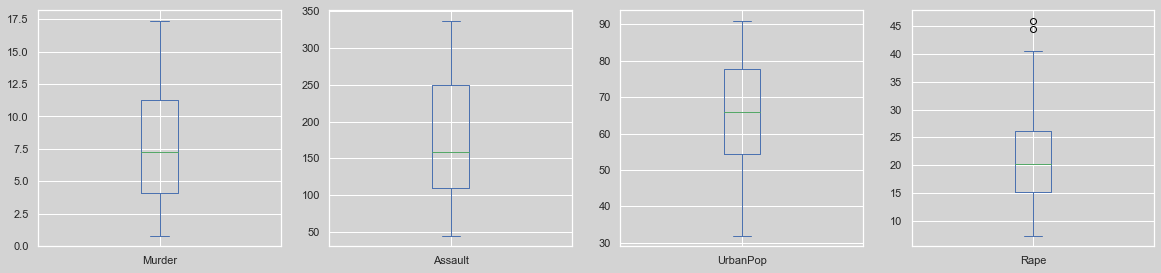

In [20]:
states.plot(kind="box",subplots=True,layout=(4,4),figsize=(20,20))
plt.show()

There are some outliers ,only in rape , not in other variables

Checking the correlation of the variables

<AxesSubplot:>

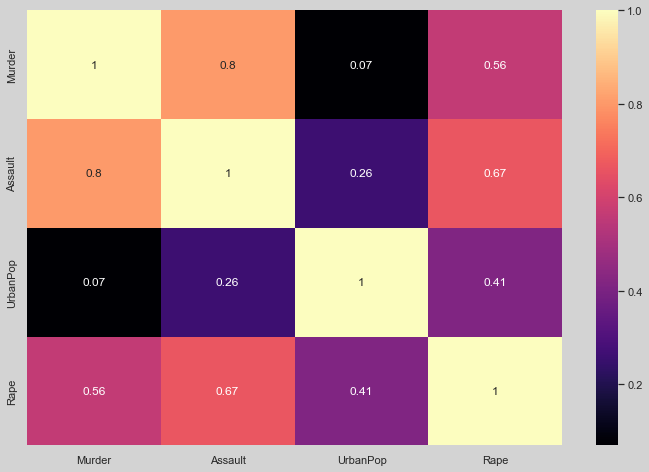

In [21]:
plt.figure(figsize= (12,8))
sns.heatmap(states.corr(), annot = True, cmap = "magma")

Kmeans Clustering

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(n_clusters=4)

In [34]:
k_fit = kmeans.fit(states)

In [35]:
k_fit.n_clusters

4

In [36]:
k_fit.cluster_centers_

array([[1.18125000e+01, 2.72562500e+02, 6.83125000e+01, 2.83750000e+01,
        2.00000000e+00],
       [5.59000000e+00, 1.12400000e+02, 6.56000000e+01, 1.72700000e+01,
        1.00000000e+00],
       [2.95000000e+00, 6.27000000e+01, 5.39000000e+01, 1.15100000e+01,
        1.00000000e+00],
       [8.21428571e+00, 1.73285714e+02, 7.06428571e+01, 2.28428571e+01,
        4.44089210e-16]])

In [37]:
sets = k_fit.labels_

In [39]:
# to see which set and index you have for the top 10 states

pd.DataFrame({"Provinces" : states.index, "Sets": sets})[0:10]

,Provinces,Sets
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,3
4,California,0
5,Colorado,3
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,3


Hierarchical Clustering

In [41]:
from scipy.cluster.hierarchy import linkage

hc_complete = linkage(states, "complete")
hc_average = linkage(states, "average")
hc_single = linkage(states, "single")

In [50]:
#dir(hc_complete)

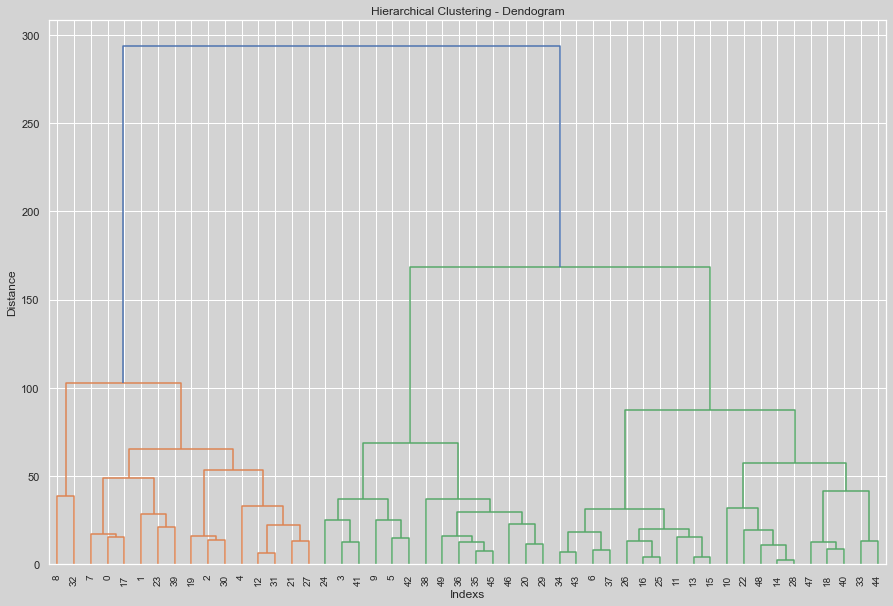

In [44]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Indexs')
plt.ylabel('Distance')
den = dendrogram(
    hc_complete,
    leaf_font_size=10
);

In [45]:
# When we look at the dendogram, it will be logical to divide it into 4 large clusters. Then we say n_cluster = 4.

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, 
                                  affinity = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(states)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [48]:

pd.DataFrame({"Provinces" : states.index, "Sets": cluster.fit_predict(states)})[0:10]

,Provinces,Sets
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [49]:
states["set_no"] = cluster.fit_predict(states)
states.head()

,Murder,Assault,UrbanPop,Rape,set_no
Index,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0
